### Answers for Assignment 7 - Plotting

Complete the tasks below. Please turn in a single Jupyter notebook named `7_first_last.ipynb` (substitute your first and last name). Please run Kernel > Restart & Run All on your notebook before turning in.

#### Moons of the Solar System

For this assignment, we will collect and wrangle data about the moons orbiting planets in our Solar System, and then we will make some plots from those data.

**1.** Data collection and wrangling.

* Find an online resource with data about the moons and planets of the Solar System (sizes and distances).
* Create an Excel spreadsheet `moons.xlsx` with the following information about each moon (suggested column names shown): 
    - Moon name (`moon_name`)
    - Host planet name (`planet_name`)
    - Moon diameter in kilometers (`moon_diameter_km`)
    - Moon–planet distance in kilometers (`moon_planet_distance_km`)
* Create an Excel spreadsheet `planets.xlsx` with the following information about each planet (suggested column names shown): 
    - Planet name (`planet_name`)
    - Planet diameter in kilometers (`planet_diameter_km`)
    - Planet–Sun distance in kilometers (`planet_sun_distance_km`)

**2.** Comparing moon diameters and volumes to their host planets.

* Import `moons.xlsx` and `planets.xlsx` as Pandas DataFrames using `pd.read_excel()`.
* Merge the DataFrames using the planet names (hint: set `left_on=planet_name` and `right_on=planet_name`).
* Calculate the volume of each moon and planet; add these to your DataFrame (suggested column names: `moon_volume_km3`, `planet_volume_km3`). (Reminder: Volume = 4/3 * π * (Diameter/2)**3.)
* Plot moon diameter versus host planet diameter (i.e., x-axis = `planet_diameter_km`, y-axis = `moon_diameter_km`) and label each moon next to its corresponding marker. Save this plot as a PDF image.
* Plot moon volume versus host planet volume (i.e., x-axis = `planet_volume_km3`, y-axis = `moon_volume_km3`) and label each moon next to its corresponding marker. Save this plot as a PDF image.
* Optional: Go back to the plots and resize the markers so they are proportional to moon diameter.

**3.** Comparing moon and sun angular diameters.

* Calculate the angular diameter of each moon as if you were standing on the surface of its home planet; add these to your DataFrame (suggested column name: `moon_angular_diameter_arcsec`). (Reminder: Angular diameter in arcseconds = 206265 * Diameter / Distance.)
* Calculate the angular diameter of the Sun as if you were standing on the surface of each home planet; add these to your DataFrame (suggested column name: `sun_angular_diameter_arcsec`).
* Plot moon angular diameter versus Sun angular diameter for each moon and label each moon next to its corresponding marker (i.e., x-axis = `sun_angular_diameter_arcsec`, y-axis = `moon_angular_diameter_arcsec`). Add a line corresponding to a 1:1 ratio. Save this plot as a PDF image.

In [1]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# use seaborn defaults
sns.set()

#### 1. Data collection and wrangling

Various sources are available to download astronomical data about the moons and planets.

The Sun's diameter in kilometers is the only value needed but not included in the two tables.

In [3]:
sun_diameter = 1392684

#### 2. Comparing moon diameters and volumes to their host planets

Import `moons.xlsx` and `planets.xlsx` as Pandas DataFrames using `pd.read_excel()`.

In [4]:
df_moons = pd.read_excel('../../data/moons.xlsx')
df_planets = pd.read_excel('../../data/planets.xlsx')

Merge the DataFrames using the planet names (hint: set `left_on=planet_name` and `right_on=planet_name`).

In [5]:
df_solar = pd.merge(df_moons, df_planets, left_on='planet_name', right_on='planet_name')

Calculate the volume of each moon and planet; add these to your DataFrame (suggested column names: `moon_volume_km3`, `planet_volume_km3`). Reminder: the formula for volume ($V$) as a function of diameter ($d$) is

$V = \frac{4}{3} \pi (\frac{d}{2})^{3}$

In [6]:
df_solar['moon_volume_km3'] = 4/3*np.pi*(df_solar['moon_diameter_km']/2)**3
df_solar['planet_volume_km3'] = 4/3*np.pi*(df_solar['planet_diameter_km']/2)**3

Plot moon diameter versus host planet diameter (i.e., x-axis = `planet_diameter_km`, y-axis = `moon_diameter_km`) and label each moon next to its corresponding marker. Save this plot as a PDF image.

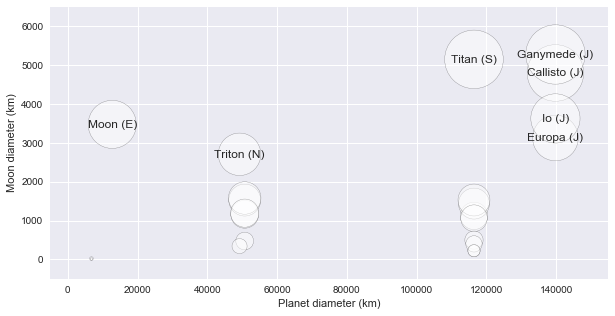

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
# scatter plot with marker size proportional to moon diameter
ax.scatter(df_solar.planet_diameter_km, df_solar.moon_diameter_km, 
           s=df_solar.moon_diameter_km/1.5, facecolor='w', edgecolor='k', 
           marker='o', alpha=0.5)
# axis limits and labels
ax.set_xlim([-5000,155000])
ax.set_ylim([-500,6500])
ax.set_xlabel('Planet diameter (km)')
ax.set_ylabel('Moon diameter (km)')
# marker labels for moons larger than 2000 km
# options for markers: ax.text/plt.text, ax.annotate/plt.annotate
for index, row in df_solar.iterrows():
    if row.moon_diameter_km > 2000:
        ax.text(row.planet_diameter_km, row.moon_diameter_km, 
                '%s (%s)' % (row.moon_name, row.planet_name[0]), 
                ha='center', va='center')
# save pdf
fig.savefig('moon_planet_diameter.pdf')

Plot moon volume versus host planet volume (i.e., x-axis = `planet_volume_km3`, y-axis = `moon_volume_km3`) and label each moon next to its corresponding marker. Save this plot as a PDF image.

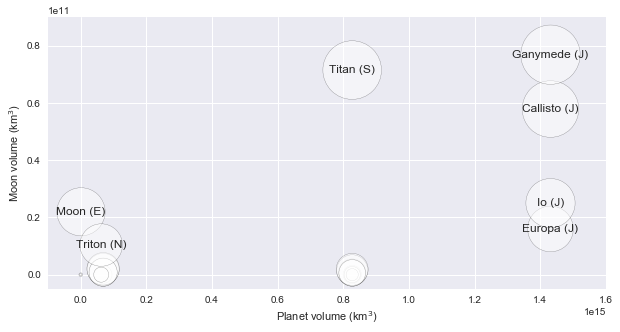

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
# scatter plot with marker size proportional to moon diameter
ax.scatter(df_solar.planet_volume_km3, df_solar.moon_volume_km3, 
           s=df_solar.moon_diameter_km/1.5, facecolor='w', edgecolor='k', 
           marker='o', alpha=0.5)
# axis limits and labels
ax.set_xlim([-1e14,1.6e15])
ax.set_ylim([-5e9,9e10])
ax.set_xlabel('Planet volume (km$^3$)')
ax.set_ylabel('Moon volume (km$^3$)')
# marker labels for moons larger than 2000 km
for index, row in df_solar.iterrows():
    if row.moon_diameter_km > 2000:
        ax.text(row.planet_volume_km3, row.moon_volume_km3, 
                '%s (%s)' % (row.moon_name, row.planet_name[0]), 
                ha='center', va='center')
# save pdf
fig.savefig('moon_planet_volume.pdf')

#### 3. Comparing moon and sun angular diameters

Calculate the angular diameter of each moon as if you were standing on the surface of its home planet; add these to your DataFrame (suggested column name: `moon_angular_diameter_arcsec`). Reminder: the formula for angular diameter ($\delta$), in arcseconds, as a function of diameter ($d$) and distance ($D$) is

$\delta = 206265 \times \frac{d}{D}$

In [9]:
def angular_diameter(d, D):
    ad = 206265 * d/D
    return(ad)

In [10]:
df_solar['moon_angular_diameter_arcsec'] = angular_diameter(df_solar.moon_diameter_km, 
                                                            df_solar.moon_planet_distance_km)

Calculate the angular diameter of the Sun as if you were standing on the surface of each home planet; add these to your DataFrame (suggested column name: `sun_angular_diameter_arcsec`).

In [11]:
df_solar['sun_angular_diameter_arcsec'] = angular_diameter(sun_diameter,
                                                           df_solar.planet_sun_distance_km)

Plot moon angular diameter versus Sun angular diameter for each moon and label each moon next to its corresponding marker (i.e., x-axis = `sun_angular_diameter_arcsec`, y-axis = `moon_angular_diameter_arcsec`). Add a line corresponding to a 1:1 ratio. Save this plot as a PDF image.

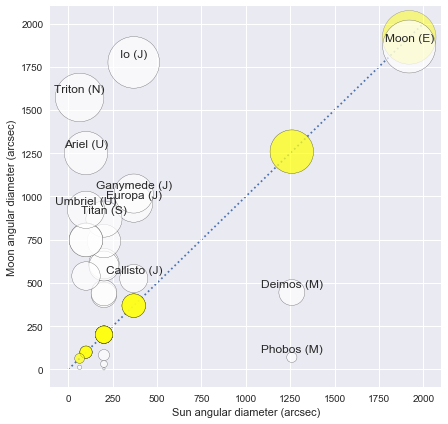

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
# scatter plot of moons with marker size proportional to moon angular diameter
ax.scatter(df_solar.sun_angular_diameter_arcsec, df_solar.moon_angular_diameter_arcsec, 
           s=df_solar.moon_angular_diameter_arcsec*1.5, facecolor='w', edgecolor='k', 
           marker='o', alpha=0.7, zorder=2)
# scatter plot of suns with marker size proportional to sun angular diameter
ax.scatter(df_solar.sun_angular_diameter_arcsec, df_solar.sun_angular_diameter_arcsec, 
           s=df_solar.sun_angular_diameter_arcsec*1.5, facecolor=sns.xkcd_rgb['yellow'], 
           edgecolor='k', marker='o', alpha=0.5, zorder=1)
# x=y line representing 1:1 ratio of moon to sun angular diameter
ax.plot([0,2000], [0,2000], ':', zorder=0)
# axis limits and labels
ax.set_xlim([-100,2100])
ax.set_ylim([-100,2100])
ax.set_xlabel('Sun angular diameter (arcsec)')
ax.set_ylabel('Moon angular diameter (arcsec)')
# marker labels for moons larger than 2000 km
for index, row in df_solar.iterrows():
    if row.moon_angular_diameter_arcsec > 800 or row.sun_angular_diameter_arcsec > 300:
        ax.text(row.sun_angular_diameter_arcsec, row.moon_angular_diameter_arcsec+50, 
                '%s (%s)' % (row.moon_name, row.planet_name[0]), 
                ha='center', va='center')
# save pdf
fig.savefig('moon_sun_angular_diameter.pdf')